# Car Evaluation Dataset Classification - KNN

<img src="https://www.volvocars.com/images/v/fr-be/v/-/media/project/contentplatform/data/media/img/promotional-unit/hero.png?h=1440&iar=0&w=2560" width ="500" height=500 > 

Title: Car Evaluation Database


Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

   CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples.


Number of Instances: 1728\
Number of Attributes: 6

Attribute Information:

Class Values:
unacc, acc, good, vgood

Attribute Values:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('data/car_data1.xlsx',index_col=0)


In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 108.0+ KB


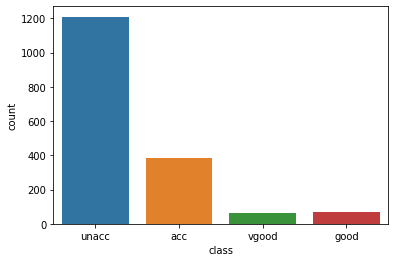

In [5]:
sns.countplot(data['class'])

# KNN Classifier



As scikit-learn algorithms do not generally work with string values, I've converted string categories to integers.



In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [7]:
from sklearn.model_selection import train_test_split

#X=data[data.columns[:-1]]
#y=data['class']

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)

In [9]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9017341040462428